In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import plotly.graph_objects as go

In [ ]:
trump_reviews = pd.read_csv('Trump.csv')
print(trump_reviews.head())

              user                                               text
0      manny_rosen   @sanofi please tell us how many shares the Cr...
1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...
2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...
3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...
4    James09254677   After 4 years you think you would have figure...


In [ ]:
biden_reviews = pd.read_csv('Biden.csv')
print(biden_reviews.head())

           user                                               text
0   MarkHodder3    @JoeBiden And we’ll find out who won in 2026...
1    K87327961G  @JoeBiden Your Democratic Nazi Party cannot be...
2      OldlaceA                        @JoeBiden So did Lying Barr
3    penblogger  @JoeBiden It's clear you didnt compose this tw...
4  Aquarian0264         @JoeBiden I will vote in person thank you.


In [ ]:
print("Initial shape of Trump reviews:", trump_reviews.shape)
print("Initial shape of Biden reviews:", biden_reviews.shape)

Initial shape of Trump reviews: (2788, 2)
Initial shape of Biden reviews: (2540, 2)


Sentiment analysis fucntions

In [ ]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [ ]:
def process_reviews(reviews):
    reviews["Sentiment Polarity"] = reviews["text"].apply(find_polarity)
    reviews["Expression Label"] = np.where(reviews["Sentiment Polarity"] > 0, "Positive", "Negative")
    reviews["Expression Label"][reviews["Sentiment Polarity"] == 0] = "Neutral"
    reviews = reviews[reviews['Sentiment Polarity'] != 0]
    indices_to_remove = np.random.choice(reviews.index, 31 if reviews.equals(biden_reviews) else 324, replace=False)
    return reviews.drop(indices_to_remove)

In [ ]:
trump_reviews = process_reviews(trump_reviews)

trump_reviews

<ipython-input-6-4c126cfd16d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["Expression Label"][reviews["Sentiment Polarity"] == 0] = "Neutral"


,user,text,Sentiment Polarity,Expression Label
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.0500,Positive
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,0.5000,Positive
6,curtiswhitworth,Really? My prices have gone up. That’s a fact.,0.2000,Positive
8,CantStandya2018,How much on stocks have you made pushing mira...,0.3500,Positive
10,npzh,No president would be able to destroy as you ...,0.1500,Positive
...,...,...,...,...
2771,MickyLafferty,"@realDonaldTrump Yeah, you're definitely afrai...",-0.6000,Negative
2773,connor182010,@realDonaldTrump Oh is little baby scared to b...,-0.1875,Negative
2782,Crystal60151335,@realDonaldTrump Absolutely!,0.2500,Positive
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.2250,Positive


visulaizing reviews

<ipython-input-8-21b4dd344161>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(trump_reviews, x='Sentiment Polarity', y='Expression Label', inner='box', palette='Dark2')


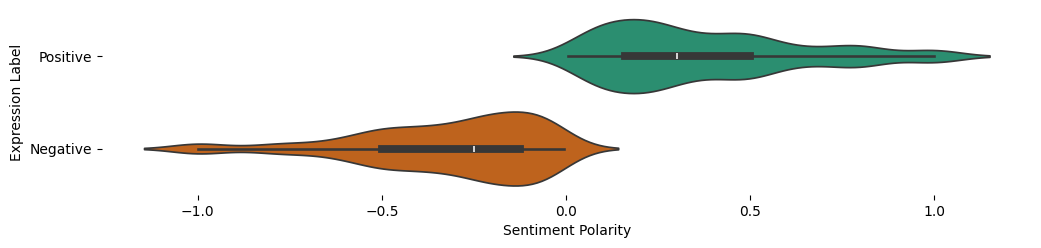

In [ ]:
#Expression Label vs Sentiment Polarity
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(trump_reviews['Expression Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(trump_reviews, x='Sentiment Polarity', y='Expression Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

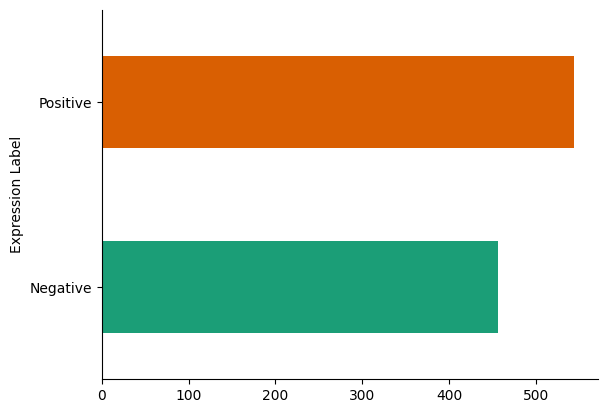

In [ ]:
#Expression Label
trump_reviews.groupby('Expression Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

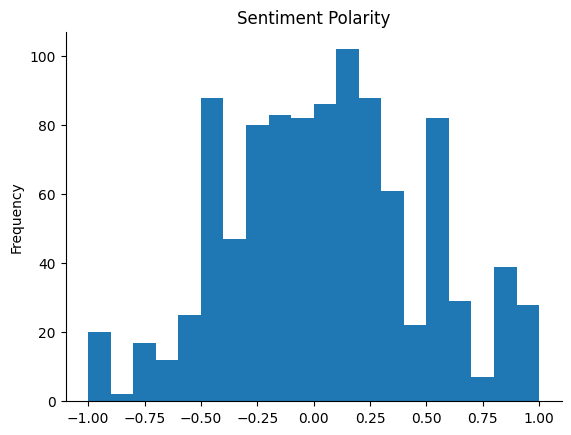

In [ ]:
#Sentiment Polarity
trump_reviews['Sentiment Polarity'].plot(kind='hist', bins=20, title='Sentiment Polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
biden_reviews = process_reviews(biden_reviews)
biden_reviews

<ipython-input-6-4c126cfd16d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["Expression Label"][reviews["Sentiment Polarity"] == 0] = "Neutral"


,user,text,Sentiment Polarity,Expression Label
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,0.050000,Positive
5,FabrizioBenass4,@JoeBiden #ALL LIVES MATTER #HUMAN RIGHTS HELP...,0.033333,Positive
14,5h0rtie,@JoeBiden @richardmarx Trouble is trump voted ...,-0.200000,Negative
15,shut_up_stewart,@JoeBiden I honestly cannot comprehend how a c...,0.200000,Positive
17,goVoteTrump,@JoeBiden He also runs his own Twitter. You sh...,0.550000,Positive
...,...,...,...,...
2527,MediciWriter,@JoeBiden Correct! Washington DC politics is w...,-0.062500,Negative
2532,Gypsy0112,@JoeBiden The only you can do to calm the wat...,0.150000,Positive
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,0.150000,Positive
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,0.100000,Positive


<ipython-input-12-c4d6347faa20>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(biden_reviews, x='Sentiment Polarity', y='Expression Label', inner='box', palette='Dark2')


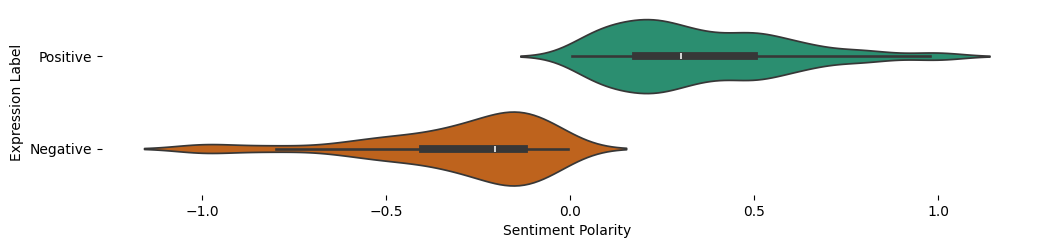

In [ ]:
#Expression Label vs Sentiment Polarity
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(biden_reviews['Expression Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(biden_reviews, x='Sentiment Polarity', y='Expression Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

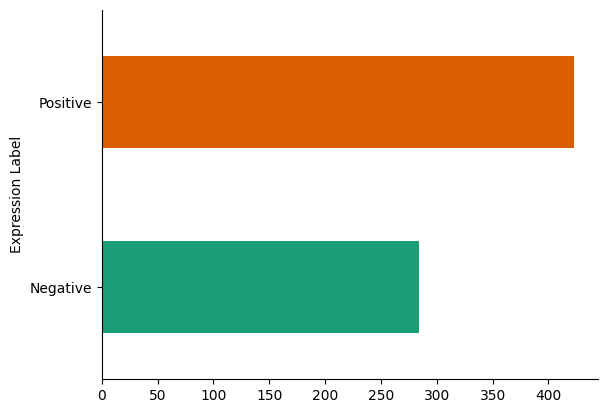

In [ ]:
#Expression Label
biden_reviews.groupby('Expression Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

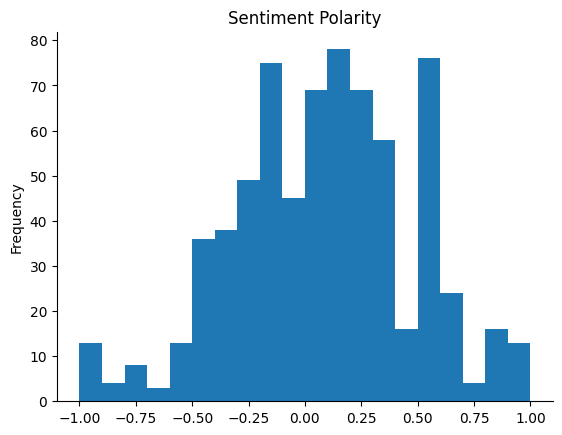

In [ ]:
#Sentiment Polarity
biden_reviews['Sentiment Polarity'].plot(kind='hist', bins=20, title='Sentiment Polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print("Shape of Trump reviews after processing:", trump_reviews.shape)
print("Shape of Biden reviews after processing:", biden_reviews.shape)

Shape of Trump reviews after processing: (1000, 4)
Shape of Biden reviews after processing: (707, 4)


In [ ]:
trump_counts = trump_reviews.groupby('Expression Label').size()
trump_counts

Expression Label
Negative    456
Positive    544
dtype: int64

In [ ]:
biden_counts = biden_reviews.groupby('Expression Label').size()
biden_counts

Expression Label
Negative    284
Positive    423
dtype: int64

importing my own library named stats_functions

In [ ]:
from stats_functions import calculate_percentage

In [ ]:
trump_positive_percentage = calculate_percentage(trump_counts['Positive'], len(trump_reviews))
trump_positive_percentage

54.400000000000006

In [ ]:
trump_negative_percentage = calculate_percentage(trump_counts['Negative'], len(trump_reviews))
trump_negative_percentage

45.6

In [ ]:
biden_positive_percentage = calculate_percentage(biden_counts['Positive'], len(biden_reviews))
biden_positive_percentage

59.830268741159834

In [ ]:
biden_negative_percentage = calculate_percentage(biden_counts['Negative'], len(biden_reviews))
biden_negative_percentage

40.169731258840166

In [ ]:
politicians = ['Joe Biden', 'Donald Trump']
positive_percentages = [biden_positive_percentage, trump_positive_percentage]
negative_percentages = [biden_negative_percentage, trump_negative_percentage]

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Positive', x=politicians, y=positive_percentages),
    go.Bar(name='Negative', x=politicians, y=negative_percentages)
])

fig.update_layout(barmode='group', title='Sentiment Analysis of Biden and Trump Reviews')
fig.show()